<a href="https://colab.research.google.com/github/ShivathejS/project/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [47]:
df = pd.read_csv('Iris.csv')

In [48]:
df = df.drop('Id', axis = 1)

In [49]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
x = df.drop('Species', axis = 1)
y = df['Species']

In [51]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')


In [57]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [58]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [59]:
# seeing if we can improve the accuracy

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [61]:
y_pred1 = rfc.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

<Axes: >

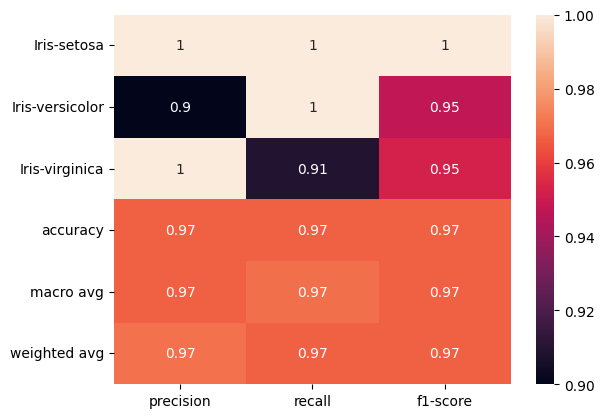

In [62]:
from sklearn.metrics import classification_report
import seaborn as sns

report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)


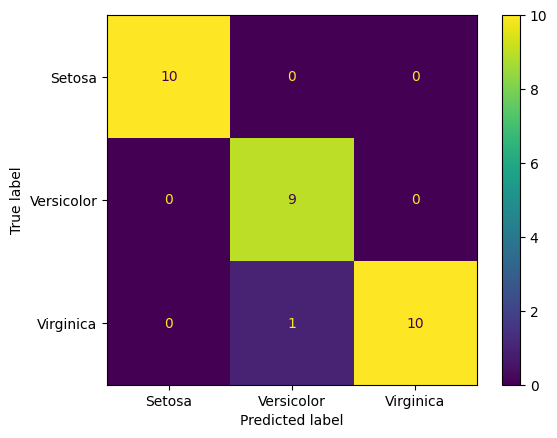

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Setosa', 'Versicolor', 'Virginica'])
disp.plot()


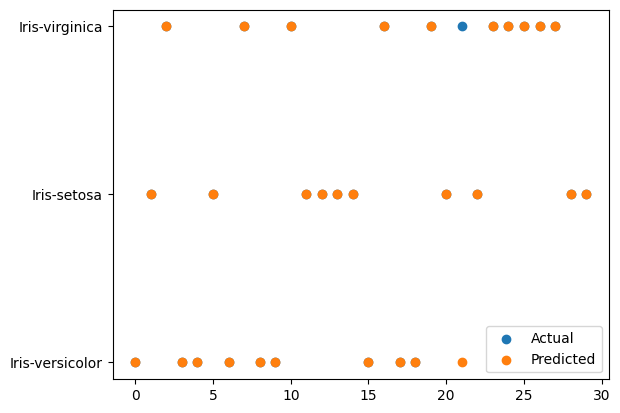

In [64]:
plt.scatter(range(len(y_test)), y_test, label='Actual')
plt.scatter(range(len(y_test)), y_pred, label='Predicted')
plt.legend()
plt.show()
